In [1]:
# DATA_DIR = "D:/ml_data/stackexchange/"
DATA_DIR = "C:/Users/marinch/Source/repos/sentence-embedding-demos/tag_curation/ml_data/stackexchange/"
import pandas as pd

In [2]:
jsonl_file = 'ai_stackexchange_posts_embeddings.jsonl'
# read jsonl file into a dataframe
df = pd.read_json(jsonl_file, lines=True)

In [3]:
jsonl_file2 = 'ai_stackexchange_posts_embeddings-14100.jsonl'
# concat the contents of jsonl_file2 to the dataframe
df2 = pd.read_json(jsonl_file2, lines=True)
df = pd.concat([df, df2], ignore_index=True)

In [4]:
# set column names to request and response
df.columns = ['request', 'response']
df

,request,response
0,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
1,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
2,"{'model': 'text-embedding-ada-002', 'input': ' '}","{'object': 'list', 'data': [{'object': 'embedd..."
3,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
4,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
...,...,...
23194,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
23195,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
23196,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."
23197,"{'model': 'text-embedding-ada-002', 'input': '...","{'object': 'list', 'data': [{'object': 'embedd..."


In [5]:
# add a text column based on request.input
df['text'] = df['request'].apply(lambda x: x['input'])

In [6]:
# remove any rows where the response does not contain an embedding
responses = df['response'].tolist()
i = 0
for r in responses:
    # try to get the embedding from the response
    try:
        r['data'][0]['embedding']
        i += 1
    except:
        print(i, r)
        # drop row i
        df.drop(i, inplace=True)
        print('-----------------')


10457 [{'error': {'message': "This model's maximum context length is 8191 tokens, however you requested 8759 tokens (8759 in your prompt; 0 for the completion). Please reduce your prompt; or completion length.", 'type': 'invalid_request_error', 'param': None, 'code': None}}, {'error': {'message': "This model's maximum context length is 8191 tokens, however you requested 8759 tokens (8759 in your prompt; 0 for the completion). Please reduce your prompt; or completion length.", 'type': 'invalid_request_error', 'param': None, 'code': None}}, {'error': {'message': "This model's maximum context length is 8191 tokens, however you requested 8759 tokens (8759 in your prompt; 0 for the completion). Please reduce your prompt; or completion length.", 'type': 'invalid_request_error', 'param': None, 'code': None}}, {'error': {'message': "This model's maximum context length is 8191 tokens, however you requested 8759 tokens (8759 in your prompt; 0 for the completion). Please reduce your prompt; or co

In [7]:
# add an embedding column based on response.data
df['vector'] = df['response'].apply(lambda x: x['data'][0]['embedding'])

In [8]:
# drop request and response columns
df = df.drop(['request', 'response'], axis=1)

In [9]:
df.shape

(23198, 2)

In [10]:
# drop rows where text is empty
df = df[df['text'] != '\n']
df.shape

(22534, 2)

In [11]:
# drop duplicates
df = df.drop_duplicates(subset=['text'])
df.shape

(22510, 2)

In [12]:
csv_file = 'ai_Posts.csv'

ai_posts = pd.read_csv(csv_file)

def combine_title_and_body(title, body):
    # I'm having trouble getting over the fact that a missing string has a numeric type.
    if title==title: # not NaN
        text = title + ' ' + body
    elif body == body:
        text = body
    else:
        text = ''
    return str(text)

ai_posts['text'] = [ combine_title_and_body(row.title, row.body).replace('<|endoftext|>', '<endoftext>').strip() + "\n" for idx, row in ai_posts.iterrows()]

In [13]:
ai_posts.shape

(23179, 6)

In [14]:
# drop rows where text is empty
ai_posts = ai_posts[ai_posts['text'] != '\n']
ai_posts.shape

(22515, 6)

In [15]:
# drop duplicates
ai_posts = ai_posts.drop_duplicates(subset=['text'])
ai_posts.shape

(22511, 6)

In [16]:
# merge the two dataframes on the text column
ai_posts = pd.merge(ai_posts, df, on='text')
ai_posts

,topic,title,body,tags,last_activity_date,text,vector
0,ai,"What is ""backprop""?","What does ""backprop"" mean? Is the ""backprop"" t...",neural-networks;backpropagation;terminology;de...,2021-07-08T10:45:23.250,"What is ""backprop""? What does ""backprop"" mean?...","[-0.011622741, -0.009513571, 0.030356765, 0.00..."
1,ai,How does noise affect generalization?,Does increasing the noise in data help to impr...,neural-networks;machine-learning;statistical-a...,2019-02-23T22:36:37.133,How does noise affect generalization? Does inc...,"[-0.019474396, 0.01699275, 0.02936180100000000..."
2,ai,NaN,"""Backprop"" is the same as ""backpropagation"": i...",NaN,2016-08-02T15:40:24.820,"""Backprop"" is the same as ""backpropagation"": i...","[-0.016287422, 0.01834437, 0.016636714, -0.014..."
3,ai,How to find the optimal number of neurons per ...,"When you're writing your algorithm, how do you...",neural-networks;hyperparameter-optimization;ar...,2021-01-19T23:54:07.813,How to find the optimal number of neurons per ...,"[0.025172584, 0.030881435000000002, 0.01347391..."
4,ai,Are humans intelligent according to the defini...,Given the following definition of an intellige...,philosophy;definitions;intelligent-agent,2019-06-15T18:29:55.520,Are humans intelligent according to the defini...,"[-0.008540249, -0.0049193646, -0.0036919457, -..."
...,...,...,...,...,...,...,...
22505,ai,NaN,The purpose of evaluating the state and action...,NaN,2022-12-04T16:24:35.890,The purpose of evaluating the state and action...,"[-0.022334248, 0.0014772362000000001, 0.034776..."
22506,ai,NaN,"In machine translation, convolution is a techn...",NaN,2022-12-04T16:29:33.587,"In machine translation, convolution is a techn...","[-0.02475856, 0.017485898, 0.0040235943, 0.006..."
22507,ai,NaN,One of the key features of ChatGPT is its abil...,NaN,2022-12-04T16:32:24.353,One of the key features of ChatGPT is its abil...,"[-0.029978512000000002, 0.0046682926, 0.012393..."
22508,ai,My cross entropy loss gradient calculation is ...,Given a neural network model for Covid-19 clas...,neural-networks;homework,2022-12-04T16:49:03.533,My cross entropy loss gradient calculation is ...,"[-0.00069859653, 0.019111514, 0.022301253, -0...."


In [17]:
# count the number of times each tag was applied
tag_counts = ai_posts['tags'].value_counts()
tag_counts

neural-networks                                                                       97
reinforcement-learning                                                                86
machine-learning                                                                      61
neural-networks;machine-learning                                                      38
natural-language-processing                                                           37
                                                                                      ..
neural-networks;machine-learning;hyper-parameters;neural-architecture-search           1
reinforcement-learning;rewards;markov-decision-process;environment;markov-property     1
deep-learning;tensorflow;keras;feedforward-neural-networks;multilayer-perceptrons      1
neural-networks;deep-learning;convolutional-neural-networks;residual-networks;vgg      1
neural-networks;homework                                                               1
Name: tags, Length: 8

In [18]:
from collections import Counter

all_tags = []
for tag_str in ai_posts['tags'].values:
    if tag_str == tag_str: # not NaN
        tags = tag_str.split(';')
        all_tags.extend(tags)
    

len(all_tags) # 36223

Counter(all_tags).most_common(100)

[('neural-networks', 2332),
 ('reinforcement-learning', 2200),
 ('machine-learning', 2099),
 ('deep-learning', 1804),
 ('convolutional-neural-networks', 1067),
 ('natural-language-processing', 628),
 ('reference-request', 453),
 ('computer-vision', 450),
 ('deep-rl', 446),
 ('comparison', 430),
 ('classification', 426),
 ('training', 410),
 ('terminology', 376),
 ('q-learning', 354),
 ('recurrent-neural-networks', 334),
 ('python', 324),
 ('tensorflow', 320),
 ('dqn', 309),
 ('papers', 306),
 ('image-recognition', 278),
 ('long-short-term-memory', 270),
 ('ai-design', 265),
 ('datasets', 251),
 ('objective-functions', 250),
 ('keras', 240),
 ('game-ai', 238),
 ('backpropagation', 236),
 ('math', 227),
 ('generative-adversarial-networks', 220),
 ('object-detection', 210),
 ('optimization', 207),
 ('definitions', 197),
 ('gradient-descent', 188),
 ('transformer', 186),
 ('applications', 184),
 ('markov-decision-process', 183),
 ('pytorch', 180),
 ('philosophy', 179),
 ('agi', 178),
 ('po

In [19]:
# Choose a variety of interesting and reasonably common tags
target_tags = ['philosophy', 'proofs', 'q-learning', 'deep-rl',  'superintelligence', 'classification']

for tt in target_tags:
    flag_col = tt + '_flag'
    ai_posts[flag_col] = [1 if tt in str(tag_str) else 0 for tag_str in ai_posts['tags'].values]
    print(f'{tt} flag column created')
    print(ai_posts[flag_col].value_counts())

philosophy flag column created
0    22330
1      180
Name: philosophy_flag, dtype: int64
proofs flag column created
0    22401
1      109
Name: proofs_flag, dtype: int64
q-learning flag column created
0    22154
1      356
Name: q-learning_flag, dtype: int64
deep-rl flag column created
0    22064
1      446
Name: deep-rl_flag, dtype: int64
superintelligence flag column created
0    22478
1       32
Name: superintelligence_flag, dtype: int64
classification flag column created
0    21950
1      560
Name: classification_flag, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import numpy as np

tag_name = 'classification'
flag_col = tag_name + '_flag'
score_col = tag_name + '_score'

X_all = [v for v in ai_posts['vector']]
y_all = [f for f in ai_posts[flag_col]]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

Cs = np.logspace(-4, 4, 5)

clf = LogisticRegressionCV(Cs=Cs, max_iter=10000)
clf.fit(X_train, y_train)

score_test = clf.predict_proba(X_test)[:,1]

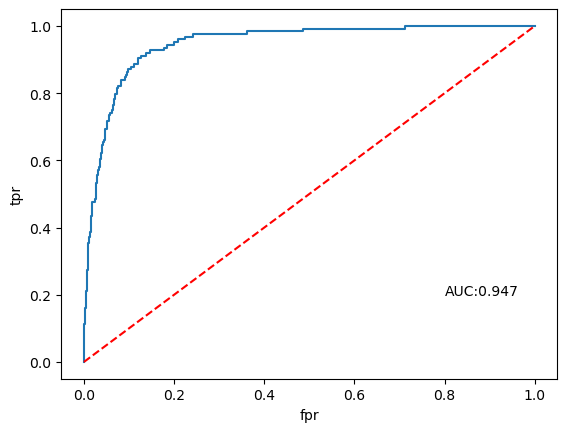

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_auc(labels, scores):
    fpr, tpr, thresholds = metrics.roc_curve(labels, scores)

    auc = metrics.roc_auc_score(labels, scores)

    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0, 1], [0, 1],'r--')
    plt.text(0.8, 0.2, f"AUC:{auc:0.3f}")

plot_auc(y_test, score_test)

In [22]:
ai_posts[score_col] = clf.predict_proba(X_all)[:,1]

In [23]:
pd.set_option('display.max_colwidth', None)
show_cols = ['text', flag_col, score_col]

# Highest scoring examples that do not have the tag
ai_posts[ai_posts[flag_col]==0].sort_values(score_col, ascending=False).head(10)[show_cols]

,text,classification_flag,classification_score
8935,"Class imbalance and ""all zeros"" one-hot encoding? I tried this example for a multi class classifier, but when looking at the data I realized two things:\n\nThere are many examples of ""all zeros"" vectors, that is, messages that don't belong in any classification.\nThese all-zeros are actually the majority, by far.\n\nIs it valid to have an all-zeros output for a certain input? I would guess a Sigmoid activation would have no problems with this, by simply not trying to force a one out of all the ""near zero"" outputs.\nBut I also think an ""accuracy"" metric will be skewed too optimistically: if all outputs are zero 90% of the time, the network will quickly overfit to always output 0 all the time, and get 90% score.\n",0,0.976336
12457,"MNIST Classification code performing with 88%-90% whereas other codes online perform 95% on first epoch I have been trying to write code to implement plain neural net without convolution from scratch. I took some help online here and added my code to my github account.\nI don't understand why the prediction made by my code is only 88%-90% accurate after the 1st epoch, whereas his code is 95% accurate after 1st epoch with the same parameters (Same Xavier initialization for weights, biases are not initialized, same hidden layer neurons). While his architecture uses 2 hidden layers, my code performed worse with 2 hidden layers. For 1 hidden layer, his code performs similar (~96%).\n",0,0.943118
20504,"Could I cluster the audio clips in order to improve the speed of their classification? I have a neural network which is very resource intensive and is used to classify audio clips. The classification is done in batches, where I record for a set period of time and then go through and classify the audio.\nHowever, the time for classification is far too long.\nSo I was thinking what if I could somehow embed the audio and then cluster them into similar audio files. This way I'd only need to classify a couple audio clips in the cluster and assume they're all the same.\nIs this possible?\nAll suggestion, improvements or help is very much appreciated!\n",0,0.902755
15392,"Can we use transformers for audio classification tasks? Since transformers are good at processing sequential data, can we also use them for audio classification problems (same as RNNs)?\n",0,0.877393
7100,"CNN output generally has more than one category in one-hot categorization? I'm a bit of a CNN newbie, and I'm trying to train one to image classify pictures of pretty similar looking particles. I'm making the inputs and labels by hand from a set of 48x48 grayscale images, and labeling them with a one-hot vector based on their position in the sequence (for example, the 400/1000th image might have a one-hot in the 4th position if I have 10 categories in the run). I'm using sigmoidal output activation and categorical cross entropy loss. I've played around with a few different optimizers, as well. I'm implementing in python keras. \nUnfortunately, although I have pretty good accuracy numbers for the training and validation, when I actually look at the outputs being produced, it generally gives multiple categories, which is not at all what I want. For example, if I have 6 categories and a label of 3, it might give the following probability vector:\n[ .99 .98 1.0 .99 0.02 0.05 ]\nIt was my understanding that categorical cross entropy would not allow this type of categorization, and yet it is prevalent in my code. I am under the impression that I'm doing something fundamentally wrong, but I cant figure out what. Any help would be appreciated.\n",0,0.871406
14251,"Given the same features, do logistic regression and neural networks produce the same output? I have a binary classification problem. I have variables (features) var1, var2, var3, ..., var14.\nUsing these variables (aka features) in a logistic regression, I get their weights.\nIf I use the same set of variables in a neural network:\

In [24]:
# Lowest scoring examples that do have the tag
ai_posts[ai_posts[flag_col]==1].sort_values(score_col, ascending=True).head(10)[show_cols]

,text,classification_flag,classification_score
12781,"Applications of polar decomposition in Machine Learning Assume there exists a new and very efficient algorithm for calculating the polar decomposition of a matrix $A=UP$, where $U$ is a unitary matrix and $P$ is a positive-semidefinite Hermitian matrix. Would there be any interesting applications in Machine Learning? Maybe topic modeling? Or page ranking? I am interested in references to articles and books.\n",1,0.000038
2255,"Detect patterns in sequences of actions I have to analyse sequences of actions that look more or less like this JSON blob. The question I'm trying to answer is whether there are recurring (sub)patterns that different users adopt when asked to perform a certain specific task -- in this case, the task is to build a mathematical formula using this editor. In particular I'd like to know if there are multiple significantly different ways in which people build the same expression.\nI thought of creating a Markov model, but that would only give me the most likely sequence of actions of length N. An obvious alternative would be to build trees and count how many times a certain path occurs in the dataset. However, the nature of the expression-building process means that the sequences can be polluted by many confounding, non-significant actions (such as streaks of UNDO-REDO, deleting symbols, and the likes).\nI might go the ""longest common subsequence"" route, but I'm not sure that would tell me if there are ""significantly different"" ways of building the same expression (in quotes because, for now, I don't have a rigorous definition of ""significantly different"", but, for example, one way would be to drag and drop-in-place all the symbols in the correct order, and another way would be to drag all the symbols onto the canvas, and then place them in the correct spots).\nI thought this might be a nice challenge for some AI algorithm, but I'm quite a noob at that, so I'm open to suggestions.\n",1,0.000271
11419,"How to update edge features in a graph using a loss function? Given a directed, edge attributed graph G, where the edge attribute is a probability value, and a particular node N (with binary features f1 and f2) in G, the algorithm that I want to implement is as follows:\n\nList all the outgoing edges from N, let this list be called edgelist_N.\nFor all the edges in edgelist_N, randomly assign to the edge attribute a probability value such that the sum of all the probabilities assigned to the edges in the edgelist_N equals to 1.\nTake the top x edges (x can be a hyperparameter).\nList the nodes in which the edges from step 3 are incoming.\nConstruct a subgraph with node N, the nodes from step 4 and the edges from step 3. \nEmbed the subgraph (preferably using a GNN) and obtain it's embedding and use it with a classifier to predict say f1/f2. \nPropagate the loss so as to update the edge probabilities, that was assigned randomly in step 2.\n\nI do not understand how to do step 7, i.e. update the edge attribute with the loss, so that edges which are more relevant in constructing the subgraph can be assigned a higher probability value.\nAny suggestion would be highly appreciated.\nThank you very much.\n",1,0.000804
584,"How does Pinterest decipher what's on unmarked pictures and categorize them? According to this article, Pinterest acquired VisualGraph, an image recognition and visual search technology startup.\nHow does Pinterest apply VisualGraph technology for machine vision, image recognition and visual search in order to classify the images?\nIn short, how do they predict the image categories? Based on what features?\n",1,0.002687
19788,"Detecting cheats visually using AI I really like to play my favorite 3D shooter game online. Unfortunately, it is really old and cheat protection isn't really common there, but cheaters are! It is very frustrating, because it really kills all the fun playing against cheaters.\nCurrently we rely to an admin that is spec